In [18]:
library(ppsr)
library(data.table)
library(tidyverse)
library(GGally)
library(visreg)
library(broom)
library(forcats)

In [19]:
mydata <- read.table('auto-mpg.data')


In [20]:
names <- c('mpg', 'cyl','disp','hp','wt','acc','year','orgin', 'carname')
colnames(mydata) <- names
mydata$orgin <- as.factor(mydata$orgin)

In [21]:
##recode factor levels
mydata$orgin <- fct_recode(mydata$orgin, domestic='1', europe='2', asia='3')

##EDA##cleaning

mydata$year <- paste0('19',mydata$year)
mydata$year <- as.numeric(mydata$year)
mydata$age <- 2020-mydata$year
mydata$hp <- as.numeric(mydata$hp)
mydata$hp <- if_else(is.na(mydata$hp), mean(mydata$hp ,na.rm=TRUE), mydata$hp)

In [22]:
head(mydata$orgin)

[1] domestic domestic domestic domestic domestic domestic
Levels: domestic europe asia

In [24]:
mydata2 <- mydata%>% select(age, everything(),-year)


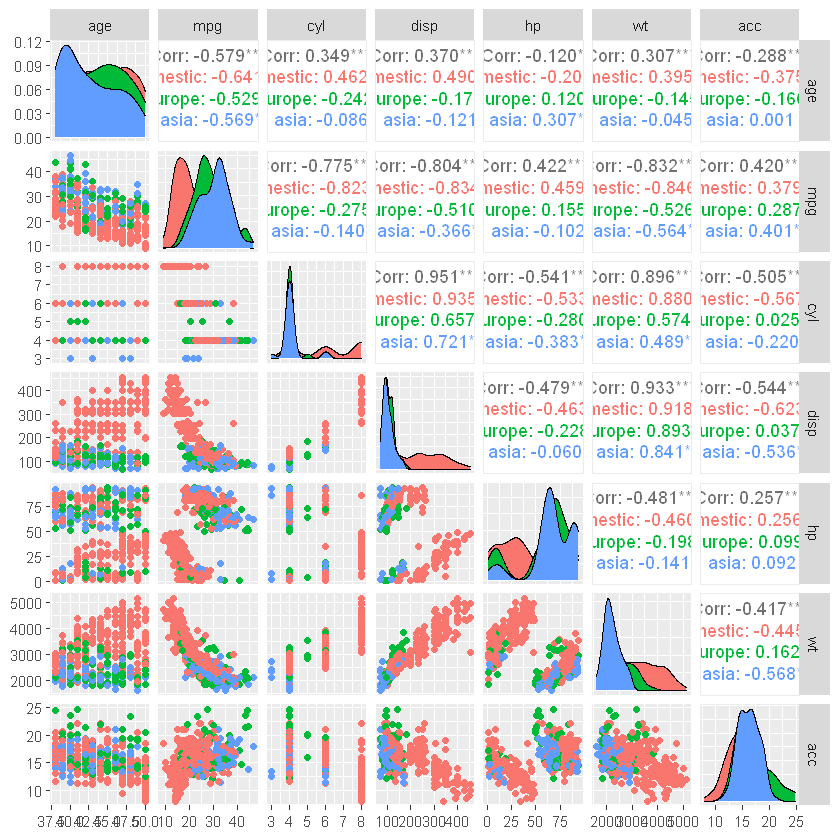

In [25]:
ggpairs(mydata2, columns=1:7, ggplot2::aes(color=orgin))


In [26]:
mod1 <- lm(mpg~., data=mydata2[,-9])


In [27]:
#get results
summary(mod1)
glance(mod1)
augment(mod1)



Call:
lm(formula = mpg ~ ., data = mydata2[, -9])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9845 -2.1523  0.0788  1.9659 13.3978 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.4555265  2.8496924  25.777  < 2e-16 ***
age         -0.8009497  0.0500094 -16.016  < 2e-16 ***
cyl         -0.2132943  0.3330097  -0.641  0.52222    
disp         0.0197784  0.0073539   2.689  0.00746 ** 
hp           0.0108465  0.0067193   1.614  0.10729    
wt          -0.0071730  0.0005829 -12.306  < 2e-16 ***
acc          0.1517534  0.0766171   1.981  0.04833 *  
orgineurope  2.7573709  0.5508476   5.006 8.45e-07 ***
orginasia    2.6829888  0.5331999   5.032 7.44e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.302 on 389 degrees of freedom
Multiple R-squared:  0.8252,	Adjusted R-squared:  0.8216 
F-statistic: 229.5 on 8 and 389 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8251697,0.8215742,3.301509,229.5018,3.482855e-142,8,-1035.549,2091.098,2130.963,4240.086,389,398


mpg,age,cyl,disp,hp,wt,acc,orgin,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,50,8,307,17,3504,12.0,domestic,14.644931,3.3550689,1.02642874,0.01978752,3.301281,2.363123e-03
15,50,8,350,35,3693,11.5,domestic,14.259068,0.7409322,0.22635641,0.01701622,3.305543,9.855074e-05
18,50,8,318,29,3436,11.0,domestic,15.328662,2.6713384,0.81781873,0.02114437,3.302918,1.605269e-03
16,50,8,304,29,3433,12.0,domestic,15.225037,0.7749634,0.23722054,0.02088712,3.305522,1.333853e-04
17,50,8,302,24,3449,10.5,domestic,14.788849,2.2111507,0.67797121,0.02413636,3.303808,1.263172e-03
15,50,8,429,42,4341,10.0,domestic,11.021759,3.9782407,1.22602844,0.03404707,3.299368,5.886841e-03
14,50,8,454,47,4354,9.0,domestic,11.325449,2.6745507,0.83169072,0.05124761,3.302821,4.151470e-03
14,50,8,440,46,4312,8.5,domestic,11.263094,2.7369057,0.84749282,0.04319693,3.302708,3.602964e-03
14,50,8,455,48,4425,10.0,domestic,10.998545,3.0014546,0.93265310,0.04983679,3.302063,5.069319e-03


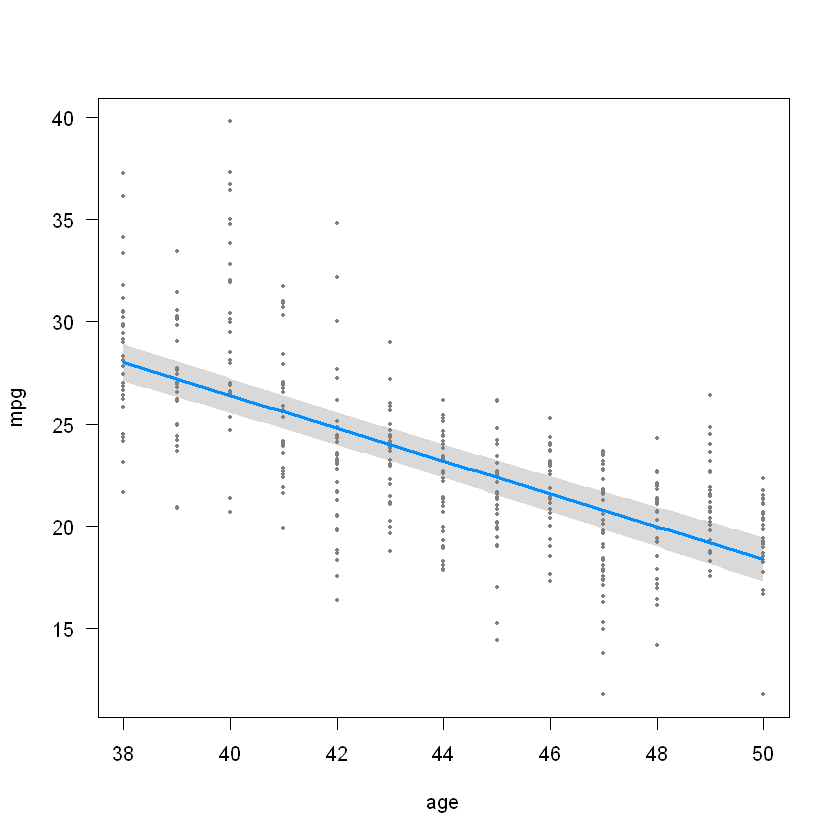

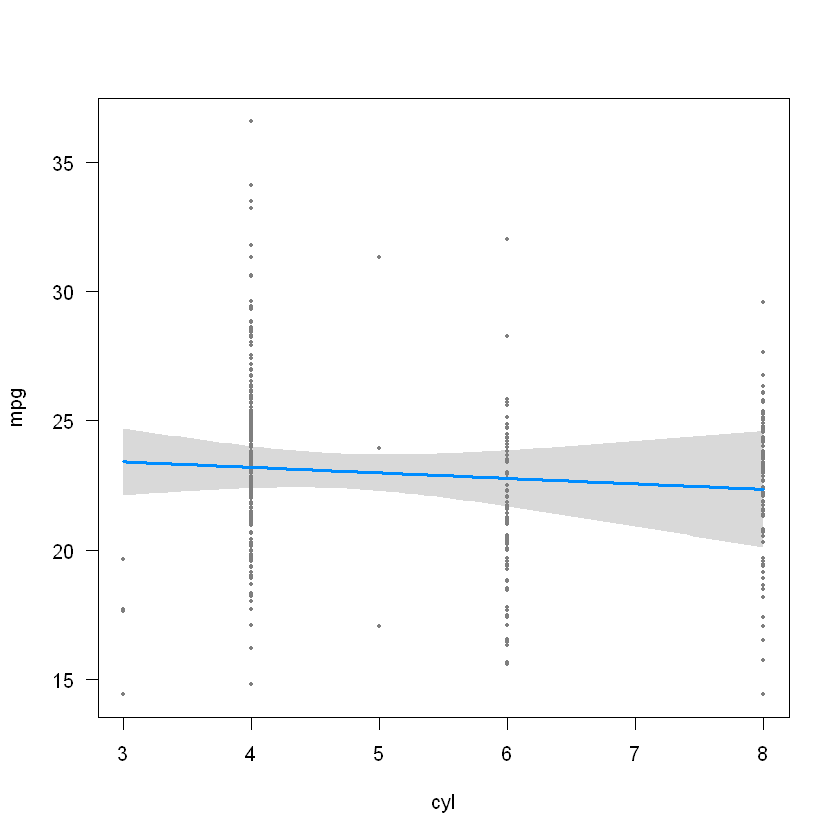

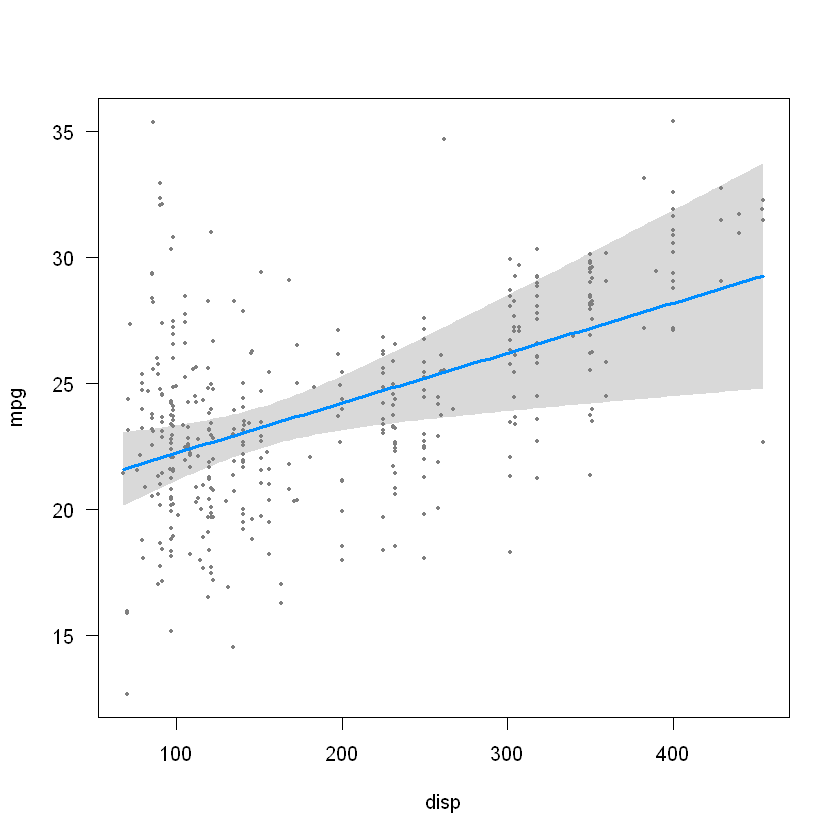

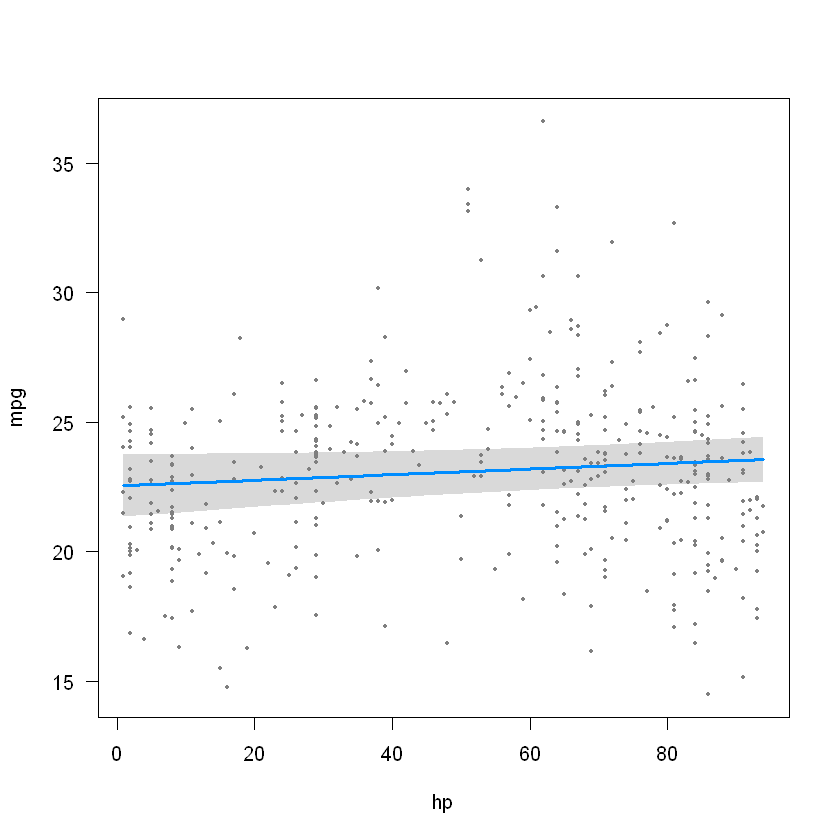

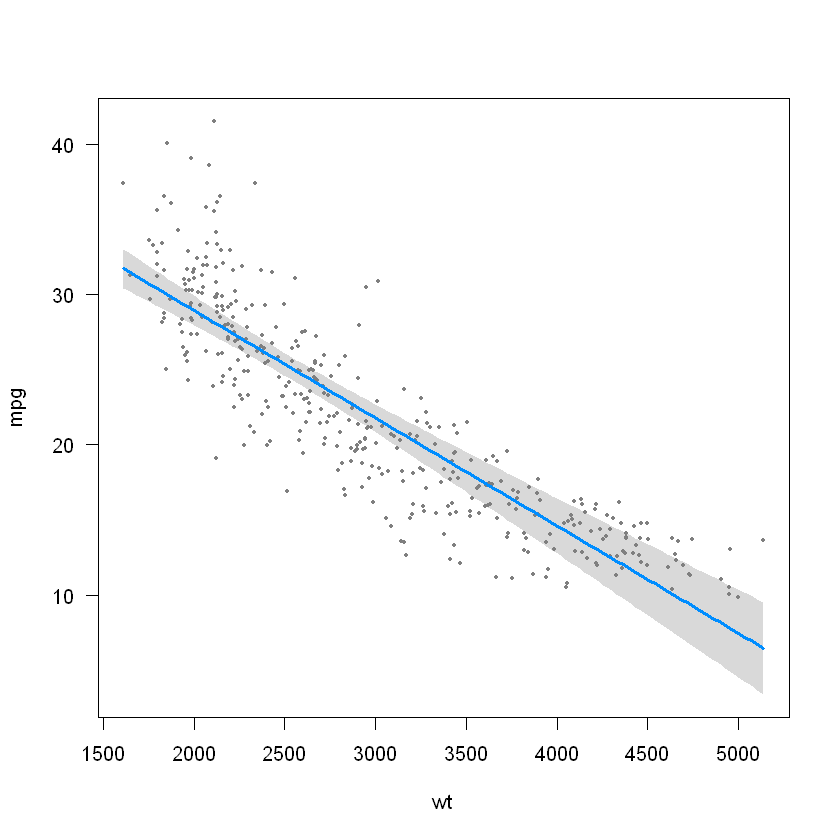

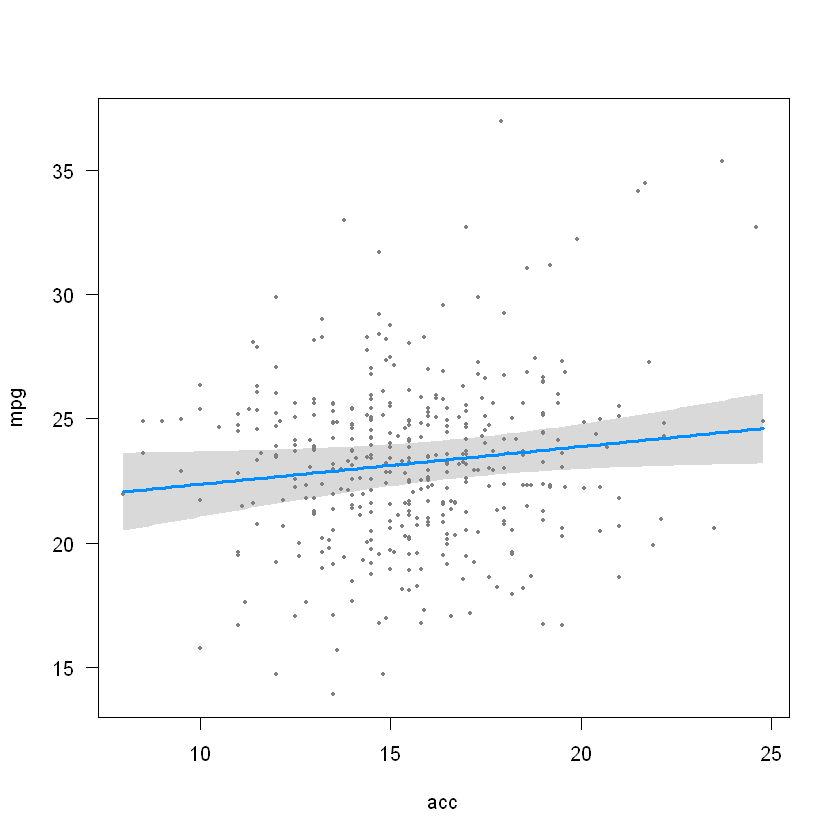

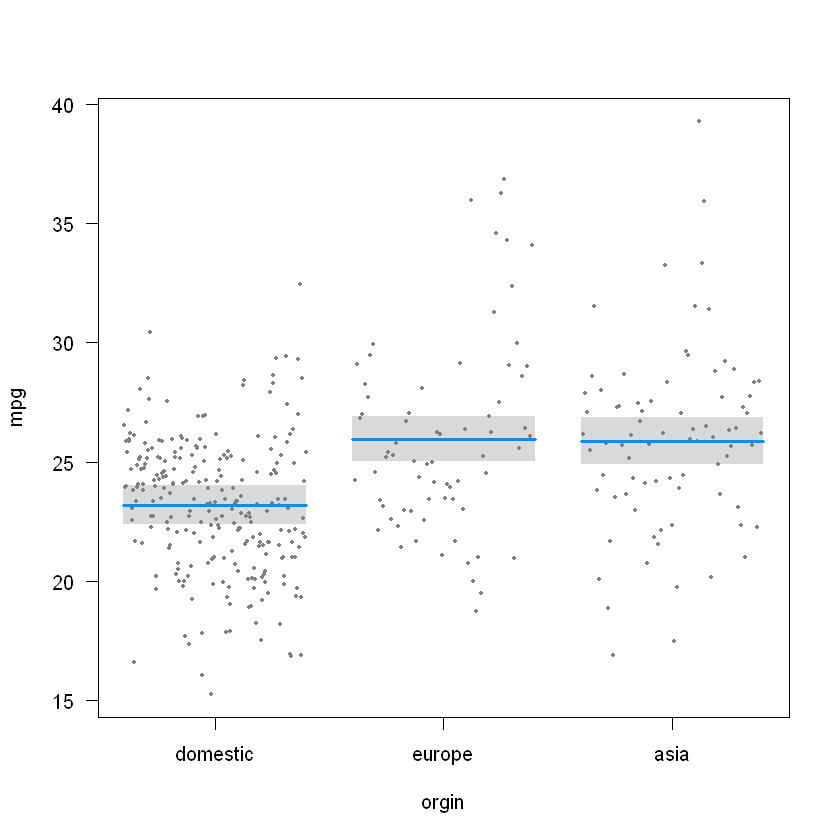

In [28]:
##create relationship plots (conditional) for each variable

visreg(mod1)

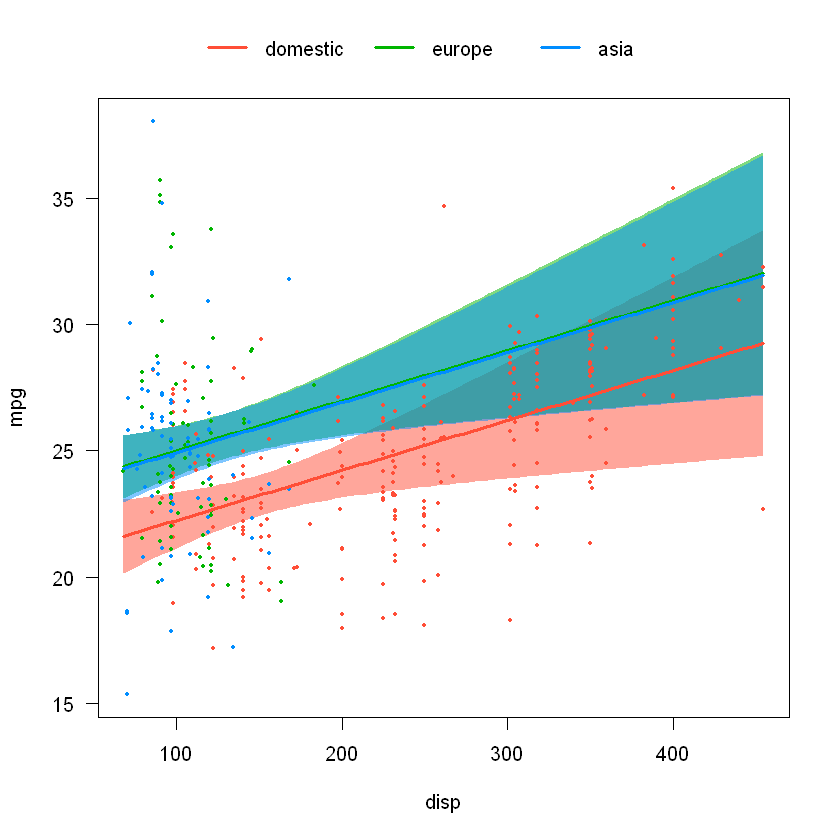

In [29]:
visreg(mod1, 'disp', by='orgin', overlay=TRUE)


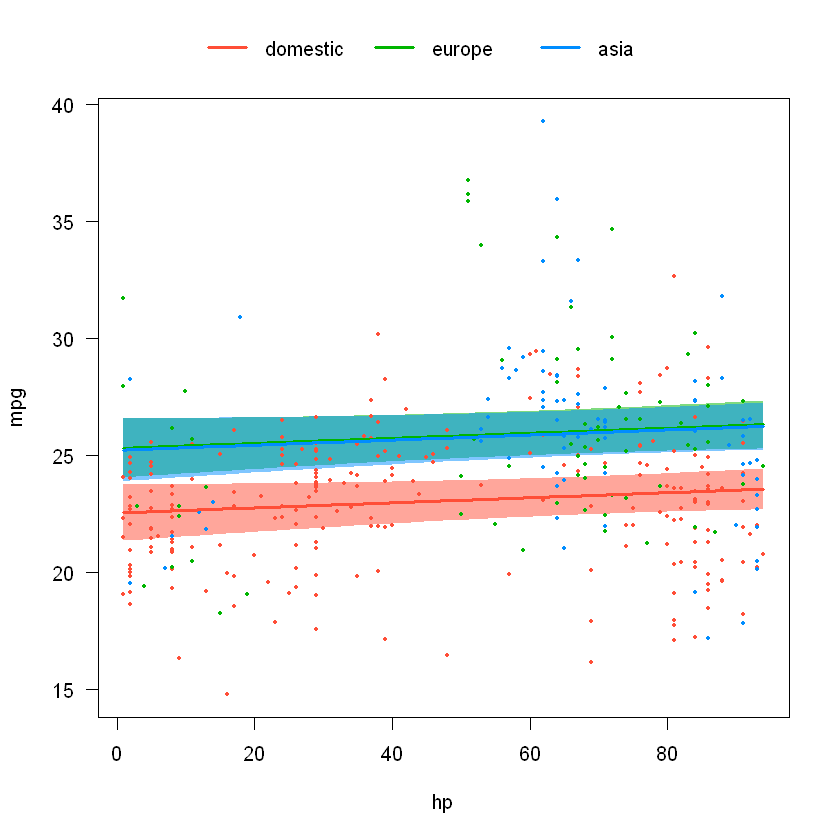

In [30]:
visreg(mod1, 'hp', by='orgin', overlay=TRUE)
